# Forecasting Timeseries Data Using Facebook Prophet(better than ARIMA)

## Steps Required for using prophet

- Introduction and installation
- Data Preprocessing with Time Series
- Model Fitting
- Obtaining the forecasts
- Plotting The forecasts
- Cross Validation
- Computing Performance Metrics
- Visualize the performance Metrics
- Conclusion


In [1]:
# we will do amazing forecasting
# pip install pystan
# pip install prophet
# Prophet gives completely automatic forecast that can be tuned by hand
import pandas as pd
import prophet
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('monthly-milk-production-pounds.csv')
df

,Month,Monthly milk production (pounds per cow)
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [3]:
# We have to convert the column name according to the need of prophet
df.columns=["ds","y"]

In [4]:
df.head()

,ds,y
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


<Axes: >

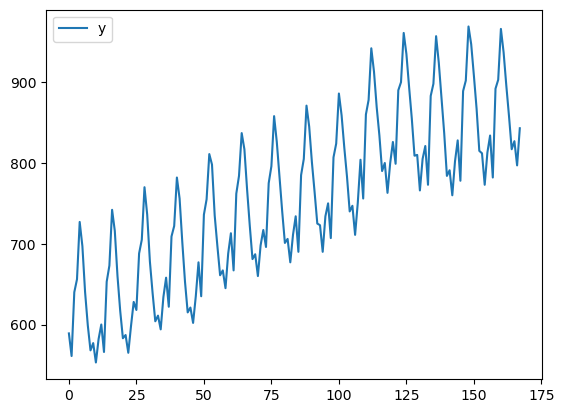

In [5]:
df.plot()
# No need for shifting
# Non stationary data
# Seasonal kind of data

In [6]:
# Convert the entire month into date time
df['ds']=pd.to_datetime(df['ds'])
# Prophet will look for date value in ds format

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      168 non-null    datetime64[ns]
 1   y       168 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [8]:
# Differencing not required , it will get handled


In [9]:
df

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727
...,...,...
163,1975-08-01,858
164,1975-09-01,817
165,1975-10-01,827
166,1975-11-01,797


<Axes: >

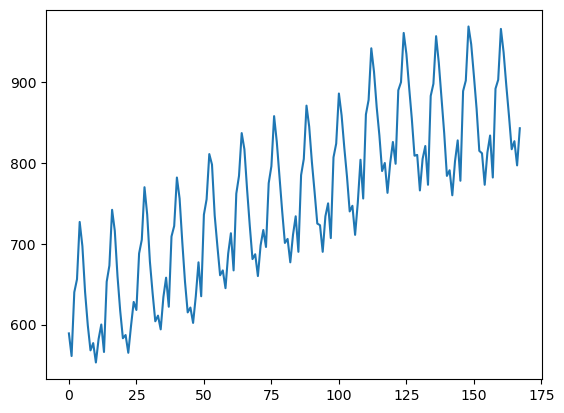

In [10]:
df['y'].plot()
 

In [11]:
# importing prophet
from prophet import Prophet

In [12]:
# In built function 
dir('Prophet')

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


In [13]:
## Initialize the model
model=Prophet()
model.fit(df)

11:44:18 - cmdstanpy - INFO - Chain [1] start processing
11:44:19 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# Details of the model
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [15]:
model.holidays_mode

'additive'

In [16]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [17]:
df.tail()

,ds,y
163,1975-08-01,858
164,1975-09-01,817
165,1975-10-01,827
166,1975-11-01,797
167,1975-12-01,843


In [18]:
# Before doing the forecasting , I have to create some amount of future dates
# Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)
future_dates
# It has created additional 365 days and appended it with the previous data

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [19]:
# Make prediction for future dates
prediction=model.predict(future_dates)
prediction
# We will see multiple values
# yhat is predicted value
# yhat ranges between yhat_lower and yhat_upper 
# and based all the other parameter it is selecting the yhat value
# Prediction- It will show the value for that particular time
# Forecasting :- It is showing us the trend , for future
# yhat is almost equal to mean (-47.13505	 -28.400086)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.936057,577.053216,596.584301,606.936057,606.936057,-20.121091,-20.121091,-20.121091,-20.121091,-20.121091,-20.121091,0.0,0.0,0.0,586.814966
1,1962-02-01,608.648457,536.479038,556.129509,608.648457,608.648457,-62.542349,-62.542349,-62.542349,-62.542349,-62.542349,-62.542349,0.0,0.0,0.0,546.106109
2,1962-03-01,610.195141,631.823758,652.458996,610.195141,610.195141,31.406679,31.406679,31.406679,31.406679,31.406679,31.406679,0.0,0.0,0.0,641.601820
3,1962-04-01,611.907542,648.612119,668.036679,611.907542,611.907542,46.736151,46.736151,46.736151,46.736151,46.736151,46.736151,0.0,0.0,0.0,658.643693
4,1962-05-01,613.564703,711.948063,731.364712,613.564703,613.564703,108.071976,108.071976,108.071976,108.071976,108.071976,108.071976,0.0,0.0,0.0,721.636679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1976-11-26,875.186582,804.444267,826.470478,870.704701,880.251750,-59.811925,-59.811925,-59.811925,-59.811925,-59.811925,-59.811925,0.0,0.0,0.0,815.374657
529,1976-11-27,875.205103,806.668226,829.637319,870.702227,880.296295,-56.654139,-56.654139,-56.654139,-56.654139,-56.654139,-56.654139,0.0,0.0,0.0,818.550964
530,1976-11-28,875.223623,810.807013,832.845955,870.701768,880.345759,-53.322310,-53.322310,-53.322310,-53.322310,-53.322310,-53.322310,0.0,0.0,0.0,821.901313
531,1976-11-29,875.242144,813.642207,836.994702,870.701839,880.399659,-49.878511,-49.878511,-49.878511,-49.878511,-49.878511,-49.878511,0.0,0.0,0.0,825.363633


In [20]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.374657,804.444267,826.470478
529,1976-11-27,818.550964,806.668226,829.637319
530,1976-11-28,821.901313,810.807013,832.845955
531,1976-11-29,825.363633,813.642207,836.994702
532,1976-11-30,828.868853,817.590276,840.556769


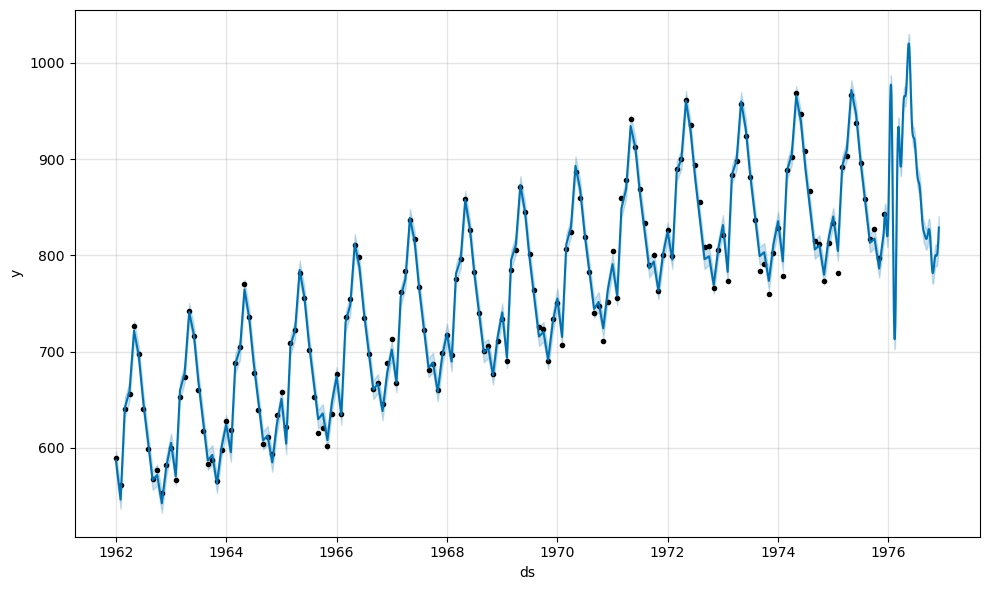

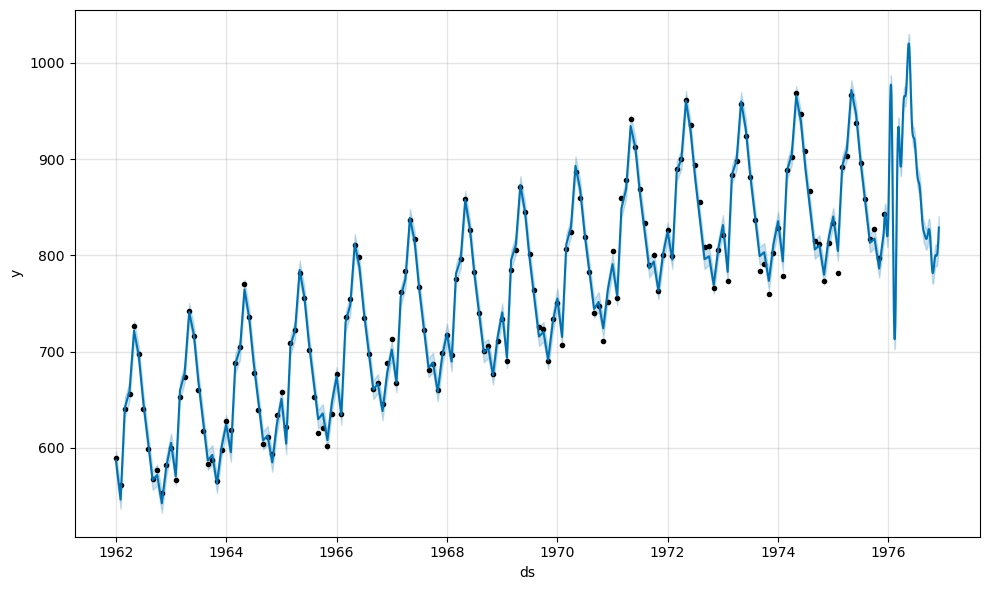

In [21]:
#Plot the predicted projection(plot forecasting)
model.plot(prediction)
# prediction from 1975-1976(last part)

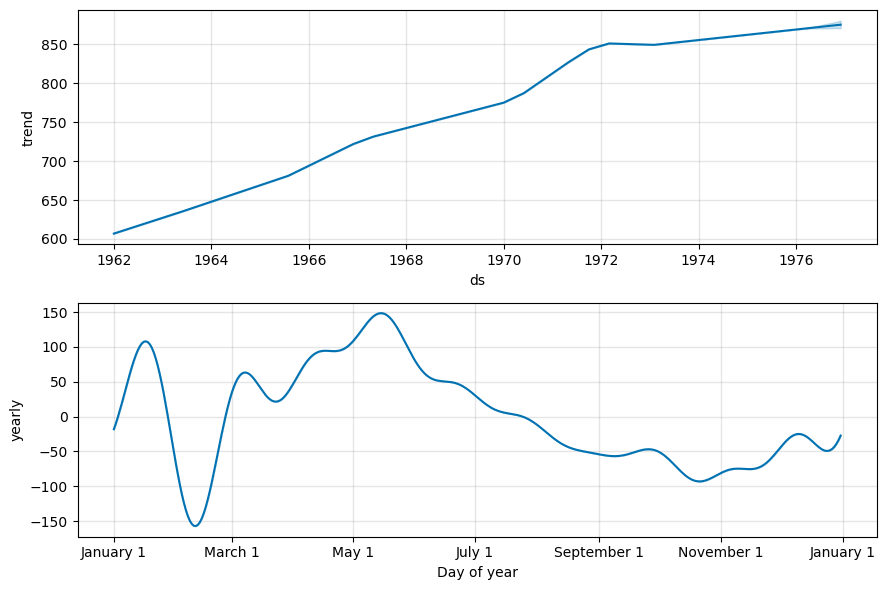

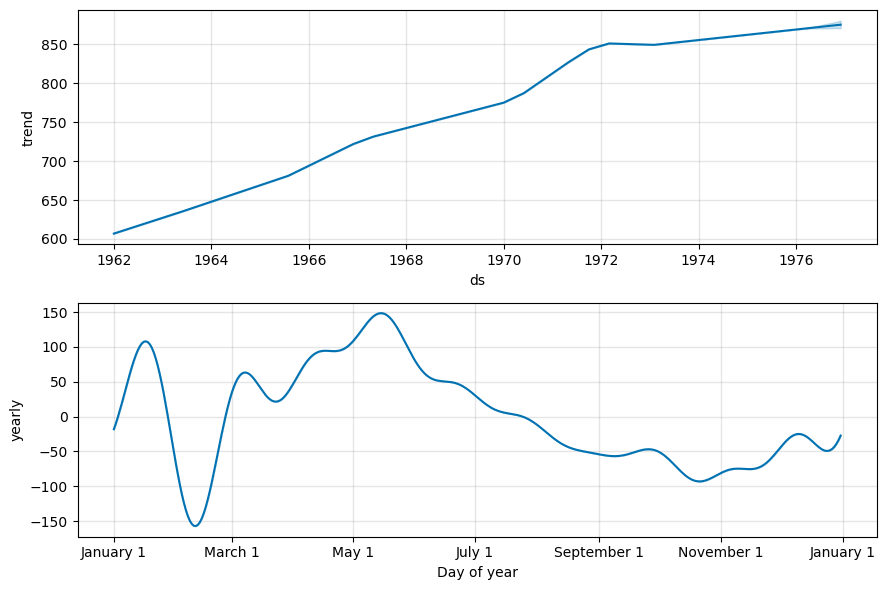

In [22]:
# Visualize each Components(trends,yearly)
model.plot_components(prediction)

# Cross Validation:-
- measure the forecast error using the historical data. we will do this by comparing the predicted and actual value.In order to perform this operation we will use cutoff point . prophet has a in built cross validation technique
1. Horizon the forecast horizon( predict for that many days)
2. initialize the size of initial trainig period( given in documentation)
3. period the spacing between cutoff dates(like 6 month i.e. 180 days)( given in documentation)



In [23]:
from prophet.diagnostics import cross_validation #(this is time series cross validation i.e. divide the date set on timeseries ,sk learn cross validation is different)
df_cv=cross_validation(model,horizon='365 days',period='180 days',initial='1095 days') 
# horizon='365 days'- # It is going to take the (end date - 365 days), days we are going to do the cv for that dates i.e. (end-365) , for the new data set i.e. 365 appended data
# period= If i do .5 in horizon , it will be .5*365 = 180 days(given in doc.)
# horizon= Since i am using the last year to do the prediction, so i have given the last 365 days
# period=It will specify the cutoff period.it is basically the half of the horizon line 
# initial=3*horizon=1095
# 2 forecast made
# check prophet image for clarity

  0%|          | 0/21 [00:00<?, ?it/s]

11:44:21 - cmdstanpy - INFO - Chain [1] start processing
11:44:39 - cmdstanpy - INFO - Chain [1] done processing
11:44:39 - cmdstanpy - INFO - Chain [1] start processing
11:44:40 - cmdstanpy - INFO - Chain [1] done processing
11:44:40 - cmdstanpy - INFO - Chain [1] start processing
11:44:40 - cmdstanpy - INFO - Chain [1] done processing
11:44:41 - cmdstanpy - INFO - Chain [1] start processing
11:44:41 - cmdstanpy - INFO - Chain [1] done processing
11:44:41 - cmdstanpy - INFO - Chain [1] start processing
11:44:42 - cmdstanpy - INFO - Chain [1] done processing
11:44:42 - cmdstanpy - INFO - Chain [1] start processing
11:44:42 - cmdstanpy - INFO - Chain [1] done processing
11:44:42 - cmdstanpy - INFO - Chain [1] start processing
11:44:43 - cmdstanpy - INFO - Chain [1] done processing
11:44:43 - cmdstanpy - INFO - Chain [1] start processing
11:44:43 - cmdstanpy - INFO - Chain [1] done processing
11:44:43 - cmdstanpy - INFO - Chain [1] start processing
11:44:44 - cmdstanpy - INFO - Chain [1]

In [32]:
df_cv
# cutoffs: list of pd.Timestamp specifying cutoffs to be used during cross validation. If not provided, they are generated as described above.
# cutoff :- It means end of the reporting period, if a company financial year end on 31 dec, then cutoff date is 31 st december
# yaht is predicted
# y is actual
# cutoff we can also select

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,624.491546,621.682625,627.013012,622,1965-01-22
1,1965-03-01,697.230329,688.418484,705.948697,709,1965-01-22
2,1965-04-01,716.197443,698.232834,732.701847,722,1965-01-22
3,1965-05-01,789.442602,760.460947,816.296366,782,1965-01-22
4,1965-06-01,756.942512,714.968357,796.500709,756,1965-01-22
...,...,...,...,...,...,...
247,1975-08-01,850.503439,840.785345,860.143201,858,1974-12-01
248,1975-09-01,808.074297,797.423606,818.054225,817,1974-12-01
249,1975-10-01,811.507807,800.970633,822.057807,827,1974-12-01
250,1975-11-01,779.535971,769.051939,789.304011,797,1974-12-01


# How a time series cv work
## SUppose i have data from 1964-1968
## 1964,1965-train data 
## 1965-1966- test data
## 1966-1968- validation data set:- it is a sample of data held back  from training your model that is used to give an estimate of model skill while tuning hyper parameter
## train data - I have trained it in the model and it is gone in model , and through cross validation , i am actually going to test it with respect to the test dataset , and from there i have got the  y hat and y


In [25]:
# I have going to find the performance matrics
from prophet.diagnostics import  performance_metrics
df_performance=performance_metrics(df_cv)
df_performance
# we are getting data with respect to all the 365 data

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,257.914063,16.059703,12.576294,0.016141,0.014527,0.016133,0.36
1,41 days,255.845121,15.995159,12.492324,0.016070,0.014527,0.016061,0.36
2,42 days,271.327292,16.472015,12.968456,0.016729,0.014907,0.016730,0.36
3,43 days,273.281641,16.531232,13.210193,0.017113,0.014907,0.017118,0.34
4,46 days,259.785384,16.117859,12.964769,0.016792,0.014907,0.016781,0.32
...,...,...,...,...,...,...,...,...
180,357 days,871.878620,29.527591,21.982047,0.027496,0.019233,0.027117,0.40
181,360 days,679.332625,26.064010,18.917067,0.023325,0.015679,0.023114,0.44
182,361 days,665.644702,25.800091,18.492915,0.022894,0.013879,0.022698,0.44
183,362 days,647.834292,25.452589,17.760284,0.022057,0.013156,0.021873,0.48


## Obtaining The Performance Metrics
 we use the performance_metrics utility to compute the mean squared error,rmse,mae,mape and the coverage of yhat lower and upper estimates

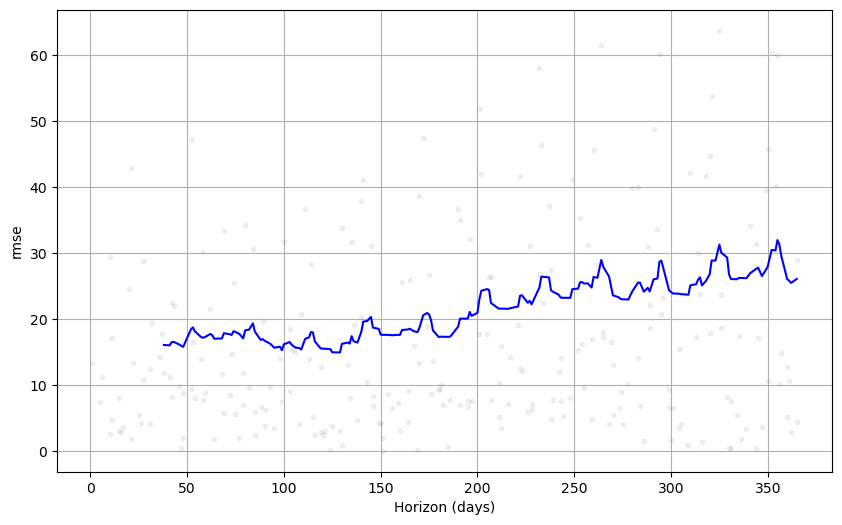

In [26]:
# For plotting
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric="rmse")

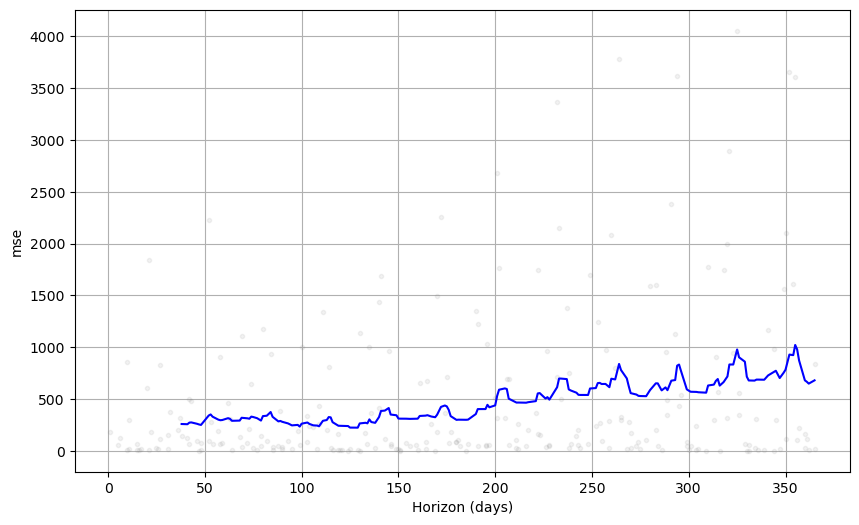

In [27]:
fig=plot_cross_validation_metric(df_cv,metric="mse")

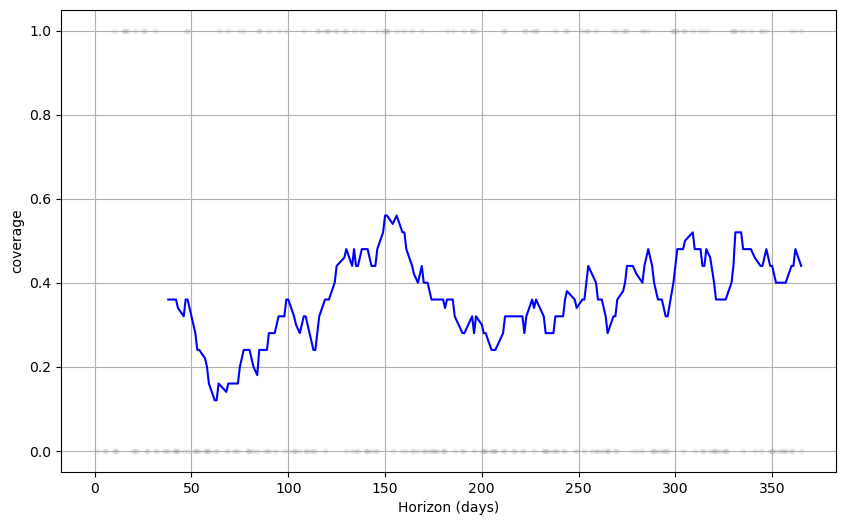

In [28]:
fig=plot_cross_validation_metric(df_cv,metric="coverage")

In [29]:
df.head() # from 1962 to 1964 it has gone to the train data

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [30]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,624.491546,621.682625,627.013012,622,1965-01-22
1,1965-03-01,697.230329,688.418484,705.948697,709,1965-01-22
2,1965-04-01,716.197443,698.232834,732.701847,722,1965-01-22
3,1965-05-01,789.442602,760.460947,816.296366,782,1965-01-22
4,1965-06-01,756.942512,714.968357,796.500709,756,1965-01-22
